In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the train and test datasets
import pandas as pd

train_path = "/content/drive/MyDrive/train.csv"
test_path = "/content/drive/MyDrive/test.csv"

train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

In [ ]:
import re
import string
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('wordnet')

# Define a preprocessing function
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)

    # Remove user mentions
    text = re.sub(r'@\w+', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text into words
    words = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [w for w in words if not w in stop_words]

    # Lemmatize the words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(w) for w in words]

    # Join the words back into a string
    text = ' '.join(words)

    return text

# Apply the preprocessing function to your dataset
train_df['text'] = train_df['text'].apply(preprocess_text)
test_df['text'] = test_df['text'].apply(preprocess_text)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
# Convert the text data into numerical features
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(train_df['text'])
X_test = vectorizer.transform(test_df['text'])
y_train = train_df['Y']
y_test = test_df['Y']

In [ ]:
# Train a logistic regression model
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=42)
clf.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
# Evaluate the performance of the model on the testing set
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7379454926624738


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, roc_auc_score

y_pred = clf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("AUC-ROC Score:", auc_roc)

Accuracy: 0.7379454926624738
Precision: 0.7505476451259584
Recall: 0.671813725490196
F1-Score: 0.7090015519917227
AUC-ROC Score: 0.8160299883379893


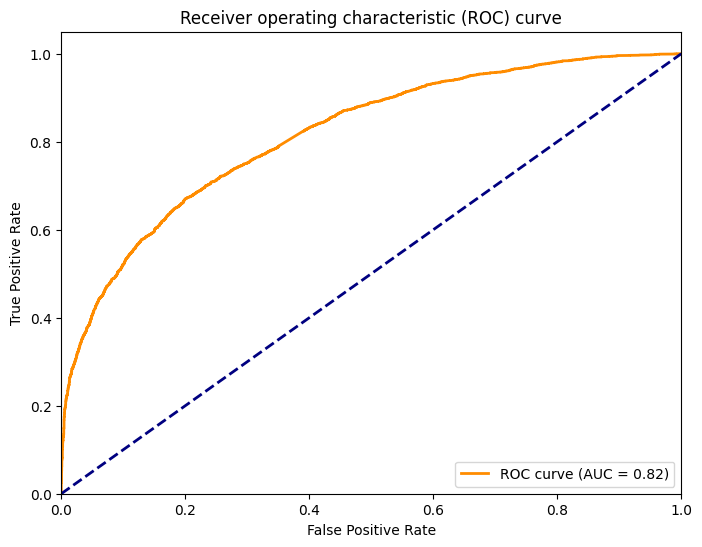

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Obtain the predicted probabilities of the test set
y_pred_prob = clf.predict_proba(X_test)[:, 1]

# Generate the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# Use the trained model to make predictions on new input text
input_text = "nature lovers look united, looking them argue over different topics"
input_vector = vectorizer.transform([input_text])
output = clf.predict(input_vector)

# Convert prediction to human-readable form
if output[0] == 0:
  prediction = "not a sarcastic sentence"
else:
  prediction = "yes, it is a sarcastic sentence"

# Print the result in the desired format
print("Sentence: ", input_text)
print("Prediction: ", prediction)

Sentence:  nature lovers look united, looking them argue over different topics
Prediction:  yes, it is a sarcastic sentence


In [ ]:
# Use the trained model to make predictions on new input text
input_text = "Oh, wonderful. Another meeting. Because there aren't enough of those already"
input_vector = vectorizer.transform([input_text])
output = clf.predict(input_vector)

# Convert prediction to human-readable form
if output[0] == 0:
  prediction = "not a sarcastic sentence"
else:
  prediction = "yes, it is a sarcastic sentence"

# Print the result in the desired format
print("Sentence: ", input_text)
print("Prediction: ", prediction)

Sentence:  Oh, wonderful. Another meeting. Because there aren't enough of those already
Prediction:  yes, it is a sarcastic sentence
